In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
test = pd.read_csv("test_data.txt")
test.drop('date',axis = 1, inplace = True)
testLabels = test["Occupancy"]
test.drop('Occupancy',axis = 1, inplace = True)

In [3]:
train = pd.read_csv("train_data.txt")
train.drop('date',axis = 1, inplace = True)
trainLabels = train["Occupancy"]
train.drop('Occupancy',axis = 1, inplace = True)

In [4]:
def makeBatches(features, labels, batchSize):
    numBatches = int(features.shape[0]/batchSize)
    labelBatches = []
    trainBatches = []
    for i in range(numBatches):
        labelBatches.append(torch.from_numpy(labels[:(i+1)*batchSize ]).float().view(-1, 1))
        trainBatches.append(torch.from_numpy(features[:(i+1)*batchSize, :]).float())
    if(features.shape[0]%batchSize!=0):
        labelBatches.append(torch.from_numpy(labels[numBatches * batchSize:]).float().view(-1, 1)) 
        trainBatches.append(torch.from_numpy(features[numBatches * batchSize:, :]).float()) 
    return trainBatches, labelBatches

In [8]:
def modelAccuracy(model, XTest, YTest):
    testLabels=torch.from_numpy(np.array(YTest)).float().view(-1, 1)
    test = torch.from_numpy(XTest).float()
    with torch.no_grad():
        model.eval()
    output = model.forward(test)
    predictedLabels = []
    for j in range(output.shape[0]): 
        if(output[j] < .5):
            predictedLabels.append(0)
        else:
            predictedLabels.append(1)
    return accuracy_score(predictedLabels, YTest)       

In [9]:
def trainModel(model,trainBatches, labelBatches, epochs, lossCriterion, optimizer):
    print(len(trainBatches))
    for e in range(1, epochs + 1):
        trainLoss = 0
        model.train()
        for i in range(len(trainBatches)):
            output = model(trainBatches[i])
            loss = lossCriterion(output, labelBatches[i])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            trainLoss += loss.item()
        if (e)%25==0:
            trainLoss = trainLoss/len(trainBatches)
            print("Epoch: {}".format(e), "Training Loss: {:.5f}.. ".format(trainLoss))



part a) <br>
batch size = 100<br>
Train error =  1.1420852265749737%<br>
Test error =  0.635767022149302%<br>
batch size = N<br>
Train error =  21.23296082524868%<br>
Test error =  21.011074651353567%<br>

In [46]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
model = torch.nn.Sequential(
        torch.nn.Linear(5, 20),
        torch.nn.Sigmoid(),
        torch.nn.Linear(20, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  
trainModel(model, trainBatches, labelBatches, 500, lossCriterion, optimizer)
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

82
Epoch: 25 Training Loss: 0.40172.. 
Epoch: 50 Training Loss: 0.33786.. 
Epoch: 75 Training Loss: 0.28274.. 
Epoch: 100 Training Loss: 0.23739.. 
Epoch: 125 Training Loss: 0.20072.. 
Epoch: 150 Training Loss: 0.17145.. 
Epoch: 175 Training Loss: 0.14699.. 
Epoch: 200 Training Loss: 0.12664.. 
Epoch: 225 Training Loss: 0.11338.. 
Epoch: 250 Training Loss: 0.10354.. 
Epoch: 275 Training Loss: 0.09626.. 
Epoch: 300 Training Loss: 0.09090.. 
Epoch: 325 Training Loss: 0.08699.. 
Epoch: 350 Training Loss: 0.08178.. 
Epoch: 375 Training Loss: 0.07935.. 
Epoch: 400 Training Loss: 0.07744.. 
Epoch: 425 Training Loss: 0.07595.. 
Epoch: 450 Training Loss: 0.07474.. 
Epoch: 475 Training Loss: 0.07366.. 
Epoch: 500 Training Loss: 0.07269.. 
Train error =  0.011420852265749737
Test error =  0.006357670221493028


In [58]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), np.array(train).shape[0])
model = torch.nn.Sequential(
        torch.nn.Linear(5, 20),
        torch.nn.Sigmoid(),
        torch.nn.Linear(20, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  
trainModel(model, trainBatches, labelBatches, 500, lossCriterion, optimizer)
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

1
Epoch: 25 Training Loss: 0.60282.. 
Epoch: 50 Training Loss: 0.59594.. 
Epoch: 75 Training Loss: 0.58934.. 
Epoch: 100 Training Loss: 0.58327.. 
Epoch: 125 Training Loss: 0.57778.. 
Epoch: 150 Training Loss: 0.57165.. 
Epoch: 175 Training Loss: 0.55710.. 
Epoch: 200 Training Loss: 0.54181.. 
Epoch: 225 Training Loss: 0.53573.. 
Epoch: 250 Training Loss: 0.53123.. 
Epoch: 275 Training Loss: 0.52731.. 
Epoch: 300 Training Loss: 0.52370.. 
Epoch: 325 Training Loss: 0.52023.. 
Epoch: 350 Training Loss: 0.51692.. 
Epoch: 375 Training Loss: 0.51344.. 
Epoch: 400 Training Loss: 0.51014.. 
Epoch: 425 Training Loss: 0.50680.. 
Epoch: 450 Training Loss: 0.50314.. 
Epoch: 475 Training Loss: 0.49917.. 
Epoch: 500 Training Loss: 0.49381.. 
Train error =  0.2123296082524868
Test error =  0.21011074651353567


part b) getting baseline error

In [11]:
baselineTestLabels = []
for i in range(testLabels.shape[0]):
    prediction = np.random.randint(2, size=5)
    counts = np.bincount(prediction)
    baselineTestLabels.append(np.argmax(counts))
baselineTrainLabels = []
for i in range(trainLabels.shape[0]):
    prediction = np.random.randint(2, size=5)
    counts = np.bincount(prediction)
    baselineTrainLabels.append(np.argmax(counts))

In [12]:
baselineTrainAccuracy = accuracy_score(baselineTrainLabels, trainLabels)
baselineTestAccuracy = accuracy_score(baselineTestLabels, testLabels)

part c) learning rate: 1e-4<br>
Train error =  07.478816161119983%<br>
Test error =  04.6246923707957355%<br>

In [34]:
def trainModel2(model,trainBatches, labelBatches, epochs, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, train):
    loss_prev = 100000
    xAxis = []
    modelAccuracyL = []
    baselineAccuracy = []
    for e in range(1, epochs + 1):
        trainLoss = 0
        model.train()
        for i in range(len(trainBatches)):
            output = model(trainBatches[i])
            loss = lossCriterion(output, labelBatches[i])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            trainLoss += loss.item()
        if(e >5 and e%10 ==0):
            modelAccuracyL.append(1 - modelAccuracy(model, train, trainLabels))
            baselineAccuracy.append(1 - baselineTrainAccuracy)
            xAxis.append(e)
        if(e%10 == 0):
            if(abs(loss_prev - loss.item()) < .0001):
#                 print(abs(loss_prev - loss.item()))
                trainLoss = trainLoss/len(trainBatches)
                print("Epoch: {}".format(e), "Training Loss: {:.5f}.. ".format(trainLoss))
                break
#             print(abs(loss_prev - loss.item()))    
            loss_prev = loss.item()    
        if (e)%25==0:
            trainLoss = trainLoss/len(trainBatches)
            print("Epoch: {}".format(e), "Training Loss: {:.5f}.. ".format(trainLoss))
    plt.plot(xAxis, modelAccuracyL, color='red', label="Training error")
    plt.plot(xAxis, baselineAccuracy, color='blue', label="BaseLine error")
    plt.xlabel("epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.show()


Epoch: 25 Training Loss: 0.46161.. 
Epoch: 50 Training Loss: 0.37277.. 
Epoch: 75 Training Loss: 0.32310.. 
Epoch: 100 Training Loss: 0.28777.. 
Epoch: 125 Training Loss: 0.26172.. 
Epoch: 150 Training Loss: 0.24210.. 
Epoch: 175 Training Loss: 0.22702.. 
Epoch: 200 Training Loss: 0.21521.. 
Epoch: 225 Training Loss: 0.20579.. 
Epoch: 250 Training Loss: 0.19815.. 
Epoch: 275 Training Loss: 0.19187.. 
Epoch: 300 Training Loss: 0.18662.. 
Epoch: 325 Training Loss: 0.18218.. 
Epoch: 350 Training Loss: 0.17837.. 
Epoch: 375 Training Loss: 0.17506.. 
Epoch: 400 Training Loss: 0.17215.. 
Epoch: 425 Training Loss: 0.16957.. 
Epoch: 450 Training Loss: 0.16725.. 
Epoch: 475 Training Loss: 0.16513.. 
Epoch: 500 Training Loss: 0.16314.. 


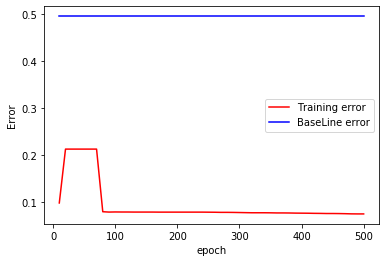

Train error =  0.07478816161119983
Test error =  0.046246923707957355


In [36]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
model = torch.nn.Sequential(
        torch.nn.Linear(5, 5),
        torch.nn.Sigmoid(),
        torch.nn.Linear(5, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)  
trainModel2(model, trainBatches, labelBatches, 500, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

part d) learning rate = 1e-4<br>
Train error =  21.23296082524868%<br>
Test error =  21.011074651353567%<br>
The error in batch size = 100 is lesser than running over the entire dataset, it is so as in full size the gradients get averaged and the randomness reduces and more chances of getting stuck in local minima, mini batches the randomness is more which improves performance.

Epoch: 25 Training Loss: 0.83601.. 
Epoch: 50 Training Loss: 0.82498.. 
Epoch: 75 Training Loss: 0.81407.. 
Epoch: 100 Training Loss: 0.80363.. 
Epoch: 125 Training Loss: 0.79340.. 
Epoch: 150 Training Loss: 0.78364.. 
Epoch: 175 Training Loss: 0.77420.. 
Epoch: 200 Training Loss: 0.76510.. 
Epoch: 225 Training Loss: 0.75638.. 
Epoch: 250 Training Loss: 0.74792.. 
Epoch: 275 Training Loss: 0.73972.. 
Epoch: 300 Training Loss: 0.73184.. 
Epoch: 325 Training Loss: 0.72434.. 
Epoch: 350 Training Loss: 0.71697.. 
Epoch: 375 Training Loss: 0.70996.. 
Epoch: 400 Training Loss: 0.70307.. 
Epoch: 425 Training Loss: 0.69654.. 
Epoch: 450 Training Loss: 0.69030.. 
Epoch: 475 Training Loss: 0.68417.. 
Epoch: 500 Training Loss: 0.67831.. 
Epoch: 525 Training Loss: 0.67267.. 
Epoch: 550 Training Loss: 0.66719.. 
Epoch: 575 Training Loss: 0.66196.. 
Epoch: 600 Training Loss: 0.65682.. 
Epoch: 625 Training Loss: 0.65190.. 
Epoch: 650 Training Loss: 0.64721.. 
Epoch: 675 Training Loss: 0.64260.. 
Epoc

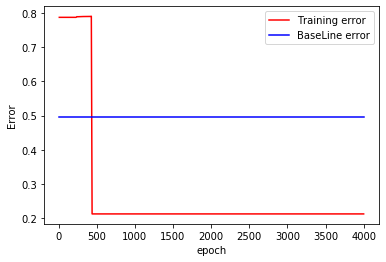

Train error =  0.2123296082524868
Test error =  0.21011074651353567


In [57]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), np.array(train).shape[0])
model = torch.nn.Sequential(
        torch.nn.Linear(5, 5),
        torch.nn.Sigmoid(),
        torch.nn.Linear(5, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)  
trainModel2(model, trainBatches, labelBatches, 4000, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

part e) The testing error is minimum at 5 and training error is min at 10, as at 10 over fitting would be happening. The curve can be explained by bias-variance tradeoff, initially the model is less complex then the model becomes over complex.

In [39]:
def trainModel3(model,trainBatches, labelBatches, epochs, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, train):
#     print(len(trainBatches))
    loss_prev = 100000
    for e in range(1, epochs + 1):
        trainLoss = 0
        model.train()
        for i in range(len(trainBatches)):
            output = model(trainBatches[i])
            loss = lossCriterion(output, labelBatches[i])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            trainLoss += loss.item()
        if(e%10 == 0):
            if(abs(loss_prev - loss.item()) < .0001):
#                 print(abs(loss_prev - loss.item()))
                trainLoss = trainLoss/len(trainBatches)
                print("Epoch: {}".format(e), "Training Loss: {:.5f}.. ".format(trainLoss))
                break
            loss_prev = loss.item()    
        if (e)%25==0:
            trainLoss = trainLoss/len(trainBatches)
            print("Epoch: {}".format(e), "Training Loss: {:.5f}.. ".format(trainLoss))

hidden Layer size =  1 ------------
Epoch: 25 Training Loss: 0.60711.. 
Epoch: 50 Training Loss: 0.58803.. 
Epoch: 75 Training Loss: 0.57528.. 
Epoch: 100 Training Loss: 0.56723.. 
Epoch: 125 Training Loss: 0.56248.. 
Epoch: 150 Training Loss: 0.55980.. 
Epoch: 175 Training Loss: 0.55837.. 
Epoch: 200 Training Loss: 0.55759.. 
Epoch: 225 Training Loss: 0.55718.. 
Epoch: 250 Training Loss: 0.55697.. 
Epoch: 275 Training Loss: 0.55686.. 
Epoch: 300 Training Loss: 0.55680.. 
Epoch: 325 Training Loss: 0.55677.. 
Epoch: 350 Training Loss: 0.55674.. 
Epoch: 375 Training Loss: 0.55674.. 
Epoch: 400 Training Loss: 0.55673.. 
Epoch: 425 Training Loss: 0.55673.. 
Epoch: 450 Training Loss: 0.55672.. 
Epoch: 475 Training Loss: 0.55672.. 
Epoch: 500 Training Loss: 0.55672.. 
hidden Layer size =  2 ------------
Epoch: 25 Training Loss: 0.63804.. 
Epoch: 50 Training Loss: 0.59122.. 
Epoch: 75 Training Loss: 0.56946.. 
Epoch: 100 Training Loss: 0.56079.. 
Epoch: 125 Training Loss: 0.55732.. 
Epoch: 15

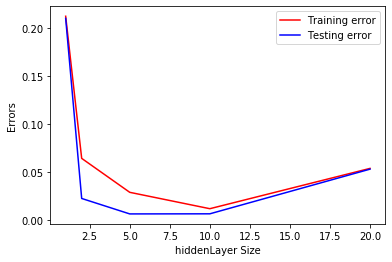

In [40]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
models = []
modelErorsTrain = []
modelErorsTest = []

xAxisH = []
for H in [1, 2 ,5, 10 ,20]:
    print("hidden Layer size = ", H, "------------")
    model = torch.nn.Sequential(
        torch.nn.Linear(5, H),
        torch.nn.Sigmoid(),
        torch.nn.Linear(H, 1),
        torch.nn.Sigmoid()
        )
    lossCriterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    trainModel3(model, trainBatches, labelBatches, 500, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
    models.append(model)
    xAxisH.append(H)
    modelErorsTrain.append(1 - modelAccuracy(model, np.array(train), trainLabels))
    modelErorsTest.append(1 - modelAccuracy(model, np.array(test), testLabels))
plt.plot(xAxisH, modelErorsTrain, color='red', label="Training error")
plt.plot(xAxisH, modelErorsTest, color='blue', label="Testing error")
plt.xlabel("hiddenLayer Size")
plt.ylabel("Errors")
plt.legend()
plt.show()


part f)<br>
Both training and testing error in BCELoss is lesser than MSELoss. As BCE is better for classification and MSE is better for regression, hence MSE penalizes error badly in this scenario. For the number of neurons vs error graph a similar trend is scene as BCE which can be explained using bias variance as done above.



Epoch: 25 Training Loss: 0.19054.. 
Epoch: 50 Training Loss: 0.13798.. 
Epoch: 75 Training Loss: 0.11686.. 
Epoch: 100 Training Loss: 0.10117.. 
Epoch: 125 Training Loss: 0.08949.. 
Epoch: 150 Training Loss: 0.08076.. 
Epoch: 175 Training Loss: 0.07416.. 
Epoch: 200 Training Loss: 0.06909.. 
Epoch: 225 Training Loss: 0.06512.. 
Epoch: 250 Training Loss: 0.06196.. 
Epoch: 275 Training Loss: 0.05934.. 
Epoch: 300 Training Loss: 0.05696.. 
Epoch: 325 Training Loss: 0.05519.. 
Epoch: 350 Training Loss: 0.05370.. 
Epoch: 375 Training Loss: 0.05244.. 
Epoch: 400 Training Loss: 0.05135.. 
Epoch: 425 Training Loss: 0.05041.. 
Epoch: 450 Training Loss: 0.04959.. 
Epoch: 475 Training Loss: 0.04887.. 
Epoch: 500 Training Loss: 0.04823.. 


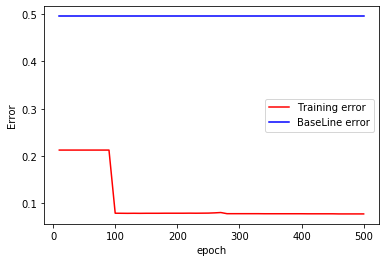

Train error =  0.07712145400957882
Test error =  0.04788761279737486


In [41]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
model = torch.nn.Sequential(
        torch.nn.Linear(5, 5),
        torch.nn.Sigmoid(),
        torch.nn.Linear(5, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)  
trainModel2(model, trainBatches, labelBatches, 500, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

Epoch: 25 Training Loss: 0.40111.. 
Epoch: 50 Training Loss: 0.39808.. 
Epoch: 75 Training Loss: 0.39498.. 
Epoch: 100 Training Loss: 0.39189.. 
Epoch: 125 Training Loss: 0.38880.. 
Epoch: 150 Training Loss: 0.38571.. 
Epoch: 175 Training Loss: 0.38264.. 
Epoch: 200 Training Loss: 0.37958.. 
Epoch: 225 Training Loss: 0.37653.. 
Epoch: 250 Training Loss: 0.37349.. 
Epoch: 275 Training Loss: 0.37047.. 
Epoch: 300 Training Loss: 0.36746.. 
Epoch: 325 Training Loss: 0.36447.. 
Epoch: 350 Training Loss: 0.36150.. 
Epoch: 375 Training Loss: 0.35855.. 
Epoch: 400 Training Loss: 0.35562.. 
Epoch: 425 Training Loss: 0.35271.. 
Epoch: 450 Training Loss: 0.34982.. 
Epoch: 475 Training Loss: 0.34695.. 
Epoch: 500 Training Loss: 0.34410.. 
Epoch: 525 Training Loss: 0.34128.. 
Epoch: 550 Training Loss: 0.33848.. 
Epoch: 575 Training Loss: 0.33570.. 
Epoch: 600 Training Loss: 0.33295.. 
Epoch: 625 Training Loss: 0.33022.. 
Epoch: 650 Training Loss: 0.32752.. 
Epoch: 675 Training Loss: 0.32485.. 
Epoc

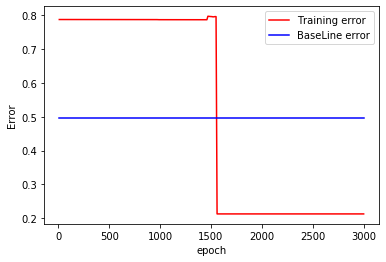

Train error =  0.2123296082524868
Test error =  0.21011074651353567


In [49]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), np.array(train).shape[0])
model = torch.nn.Sequential(
        torch.nn.Linear(5, 5),
        torch.nn.Sigmoid(),
        torch.nn.Linear(5, 1),
        torch.nn.Sigmoid()
        )
lossCriterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)  
trainModel2(model, trainBatches, labelBatches, 3000, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))

hidden Layer size =  1 ------------
Epoch: 25 Training Loss: 0.18563.. 
Epoch: 50 Training Loss: 0.18519.. 
Epoch: 75 Training Loss: 0.18505.. 
Epoch: 100 Training Loss: 0.18501.. 
Epoch: 125 Training Loss: 0.18500.. 
Epoch: 150 Training Loss: 0.18499.. 
Epoch: 175 Training Loss: 0.18499.. 
Epoch: 200 Training Loss: 0.18499.. 
Epoch: 220 Training Loss: 0.18499.. 
hidden Layer size =  2 ------------
Epoch: 25 Training Loss: 0.25465.. 
Epoch: 50 Training Loss: 0.20883.. 
Epoch: 75 Training Loss: 0.19120.. 
Epoch: 100 Training Loss: 0.18622.. 
Epoch: 125 Training Loss: 0.18520.. 
Epoch: 150 Training Loss: 0.18503.. 
Epoch: 175 Training Loss: 0.18500.. 
Epoch: 200 Training Loss: 0.18500.. 
Epoch: 225 Training Loss: 0.18499.. 
Epoch: 250 Training Loss: 0.18499.. 
hidden Layer size =  5 ------------
Epoch: 25 Training Loss: 0.15961.. 
Epoch: 50 Training Loss: 0.11709.. 
Epoch: 75 Training Loss: 0.09398.. 
Epoch: 100 Training Loss: 0.07982.. 
Epoch: 125 Training Loss: 0.06988.. 
Epoch: 150 Tr

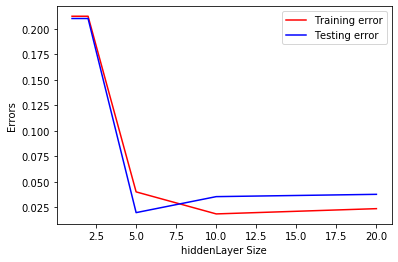

In [60]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
models = []
modelErorsTrain = []
modelErorsTest = []

xAxisH = []
for H in [1, 2 ,5, 10 ,20]:
    print("hidden Layer size = ", H, "------------")
    model = torch.nn.Sequential(
        torch.nn.Linear(5, H),
        torch.nn.Sigmoid(),
        torch.nn.Linear(H, 1),
        torch.nn.Sigmoid()
        )
    lossCriterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    trainModel3(model, trainBatches, labelBatches, 500, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
    models.append(model)
    xAxisH.append(H)
    modelErorsTrain.append(1 - modelAccuracy(model, np.array(train), trainLabels))
    modelErorsTest.append(1 - modelAccuracy(model, np.array(test), testLabels))
plt.plot(xAxisH, modelErorsTrain, color='red', label="Training error")
plt.plot(xAxisH, modelErorsTest, color='blue', label="Testing error")
plt.xlabel("hiddenLayer Size")
plt.ylabel("Errors")
plt.legend()
plt.show()


part g) The training and testing errors are nearly same but the training error is slightly lower in the case of 2 layer and testing error is slightly higher than single layer as overfitting would be happening.  20-h1-h2-5 and 20-h1-h2-40 have lesser training error that 20-h1

In [44]:
trainBatches, labelBatches = makeBatches(np.array(train), np.array(trainLabels), 100)
models = []
modelErorsTrain = []
modelErorsTest = []

xAxisH = []
for H1 in [ 20 ]:
    for H2 in [5, 20, 40]:
        print(H1,"-h1-h2-",H2)
        model = torch.nn.Sequential(
            torch.nn.Linear(5, H),
            torch.nn.Sigmoid(),
            torch.nn.Linear(H1, H2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(H2, 1),
            torch.nn.Sigmoid()
            )
        lossCriterion = torch.nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
        trainModel3(model, trainBatches, labelBatches, 500, lossCriterion, optimizer, baselineTrainAccuracy, trainLabels, np.array(train))
        models.append(model)
        xAxisH.append(H)
        print("Train error = ", 1 - modelAccuracy(model, np.array(train), trainLabels))
        print("Test error = ", 1 - modelAccuracy(model, np.array(test), testLabels))
        print()

20 -h1-h2- 5
Epoch: 25 Training Loss: 0.53951.. 
Epoch: 50 Training Loss: 0.48879.. 
Epoch: 75 Training Loss: 0.40795.. 
Epoch: 100 Training Loss: 0.31908.. 
Epoch: 125 Training Loss: 0.24787.. 
Epoch: 150 Training Loss: 0.19842.. 
Epoch: 175 Training Loss: 0.16277.. 
Epoch: 200 Training Loss: 0.12367.. 
Epoch: 225 Training Loss: 0.10543.. 
Epoch: 250 Training Loss: 0.09163.. 
Epoch: 275 Training Loss: 0.08360.. 
Epoch: 300 Training Loss: 0.07881.. 
Epoch: 325 Training Loss: 0.07563.. 
Epoch: 350 Training Loss: 0.07356.. 
Epoch: 375 Training Loss: 0.07206.. 
Epoch: 400 Training Loss: 0.07097.. 
Epoch: 425 Training Loss: 0.07002.. 
Epoch: 450 Training Loss: 0.06906.. 
Epoch: 475 Training Loss: 0.06830.. 
Epoch: 500 Training Loss: 0.06767.. 
Train error =  0.010806827950386788
Test error =  0.03712059064807216

20 -h1-h2- 20
Epoch: 25 Training Loss: 0.46200.. 
Epoch: 50 Training Loss: 0.32489.. 
Epoch: 75 Training Loss: 0.21527.. 
Epoch: 100 Training Loss: 0.16314.. 
Epoch: 125 Training 